In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline


In [67]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [68]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 Check whether How many patients have diabetes


*   0 means doesn't have
*   1 means does have

Considerng given data we can see most of them do not have diabetes. 



Outcome
0    500
1    268
dtype: int64

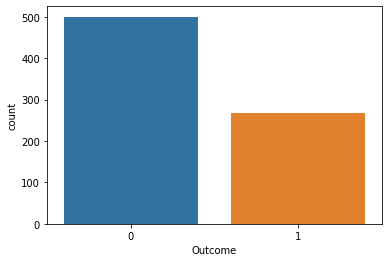

In [70]:
sns.countplot(x = 'Outcome',data = df)

df.groupby('Outcome').size()

Here you can see given plot describes whether she does not have diabetes or does have diabetes considering her Pregnancies level. 

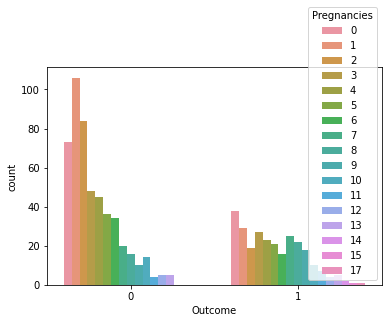

In [71]:
sns.countplot(x = 'Outcome', hue = 'Pregnancies',data = df)

This graph describes how many patients are their in relevent Pregnancies level. Since level_2 Pregnancies level shows much patients than levels.

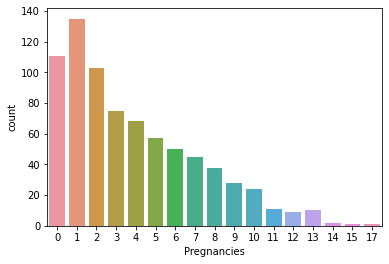

In [72]:
sns.countplot(x = 'Pregnancies',data = df)

Below two graphs describe distribution of age group among the all of data. We can see there are lot of patients in age 20 - 30. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


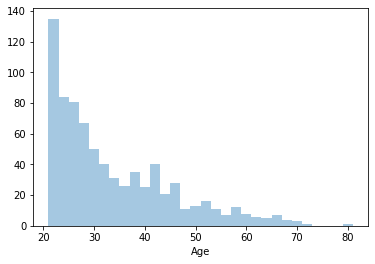

In [73]:
sns.distplot(df['Age'].dropna(),kde = False, bins =30)

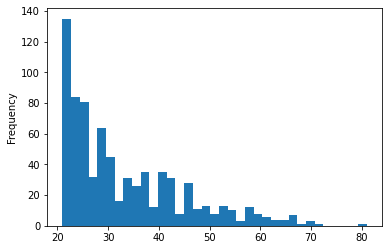

In [74]:
df['Age'].plot.hist(bins= 35)

Considering the given data set there are many of them represnting range in BMI 20 to 40. 

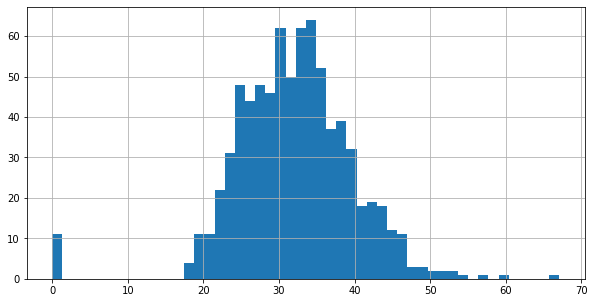

In [75]:
df['BMI'].hist(bins =50,figsize = (10,5))

This distributation says Pregnancies level and its relative age group.

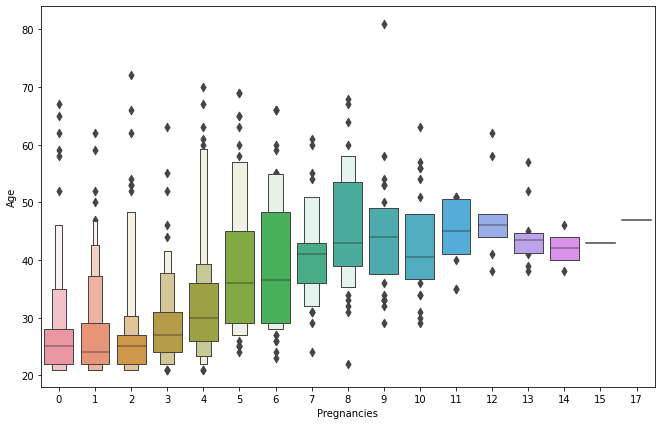

In [76]:
plt.figure(figsize=(11,7))
sns.boxenplot(x ='Pregnancies', y = 'Age',data = df)

In [77]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)


(724, 9)


In [78]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred = reg.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       120
           1       0.75      0.66      0.70        61

    accuracy                           0.81       181
   macro avg       0.80      0.77      0.78       181
weighted avg       0.81      0.81      0.81       181



In [84]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test,pred)

array([[107,  13],
       [ 21,  40]])

In [85]:
reg.score(X_test,y_test)

0.8121546961325967

In [86]:
reg.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0])

Here, ‘h’ is the hypothesis or the predicted value and X is the predictor or input variable. Theta is initialized randomly in the beginning and updated it later.

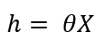
 

In [87]:
theta = [0.5]*len(X.columns)
theta

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

Logistic regression uses the sigmoid function to predict the output. Here is the sigmoid activation function. 

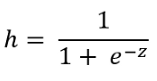

The hypothesis is simply the implementation of the sigmoid function. If the outcome of the hypothesis expression comes out to be 1, then this expression will turn out to be the log of zero. To mitigate that, I used this very small number at the end.

In [88]:
def hypothesis(X, theta):
    z = np.dot(theta, X.T)
    return 1/(1+np.exp(-(z))) - 0.0000001

Simplified and combined cost function

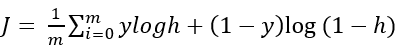

In [89]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

Here this cells is described update the theta values.

Theta values need to keep updating until the cost function reaches its minimum. We should get our final theta values and the cost of each iteration as output

In [90]:
def gradient_descent(X, y, theta, alpha, epochs):
    m =len(X)
    J = [cost(X, y, theta)] 
    for i in range(0, epochs):
        h = hypothesis(X, theta)
        for i in range(0, len(X.columns)):
            theta[i] -= (alpha/m) * np.sum((h-y)*X.iloc[:, i])
        J.append(cost(X, y, theta))
    return J, theta

In [91]:
#L, theta = gradient_descent(X, y, theta, 0.03, 2)

In [92]:
def predict(X, y, theta, alpha, epochs):
    J,theta = gradient_descent(X, y, theta, alpha, epochs) 
    h = hypothesis(X, theta)
    for i in range(len(h)):
        h[i]=1 if h[i]>=0.5 else 0
    y = list(y)
    accuracy = np.sum([y[i] == h[i] for i in range(len(y))])/len(y)
    return J, accuracy

In [93]:
predict(X, y, theta, 0.03, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


([10.574717485297269, -0.0, 5.339682351189788, -0.0], 0.6560773480662984)

In [94]:
theta = [0.5]*len(X.columns)
J, accuracy = predict(X, y, theta, 0.01, 10)

accuracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0.6146408839779005

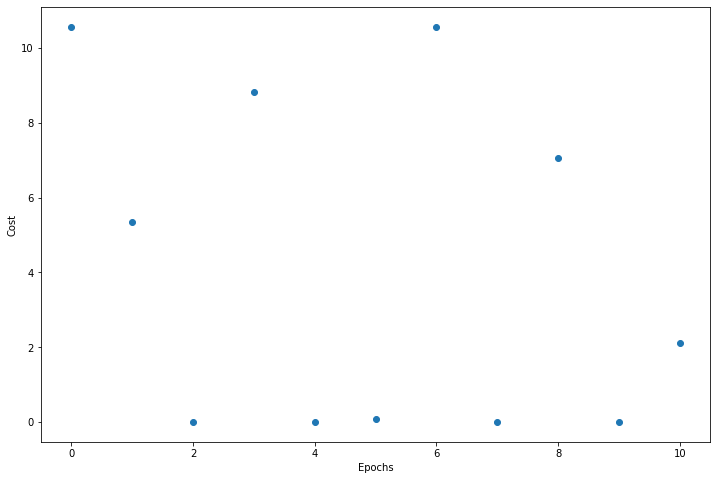

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()



In [96]:
theta = [0.5]*len(X.columns)
J, accuracy = predict(X, y, theta, 0.001, 1200)

accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0.5524861878453039

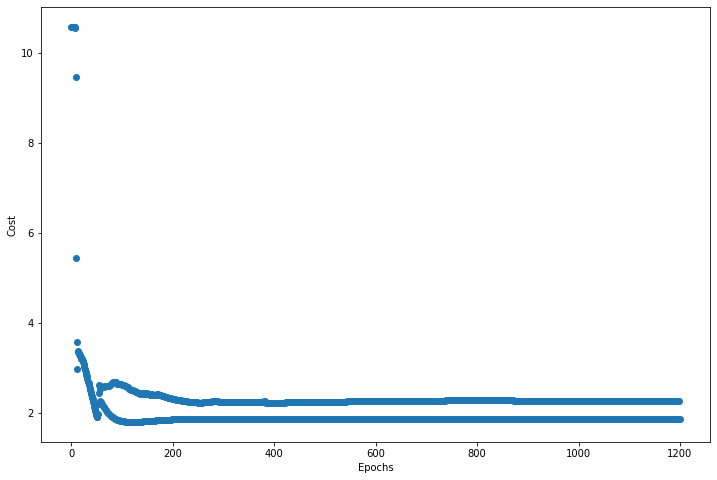

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()


In [116]:
theta = [0.5]*len(X.columns)
J, accuracy = predict(X, y, theta, 0.0002, 2000)

accuracy


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0.7002762430939227

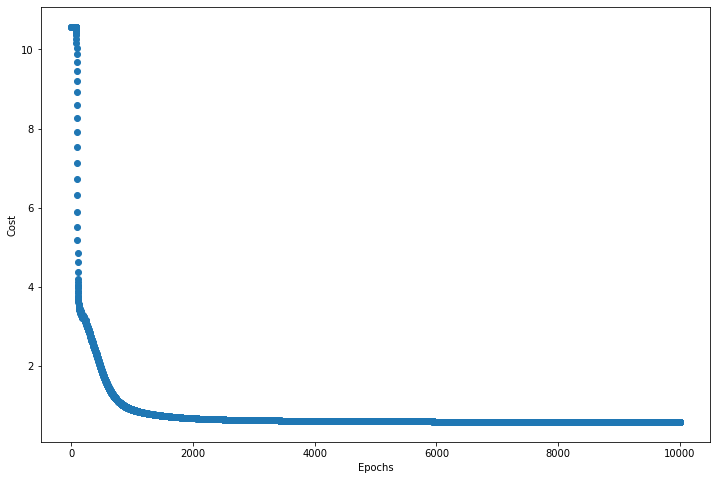

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [129]:
theta = [0.5]*len(X.columns)
J, accuracy = predict(X, y, theta, 0.000025, 250000)

accuracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0.7044198895027625

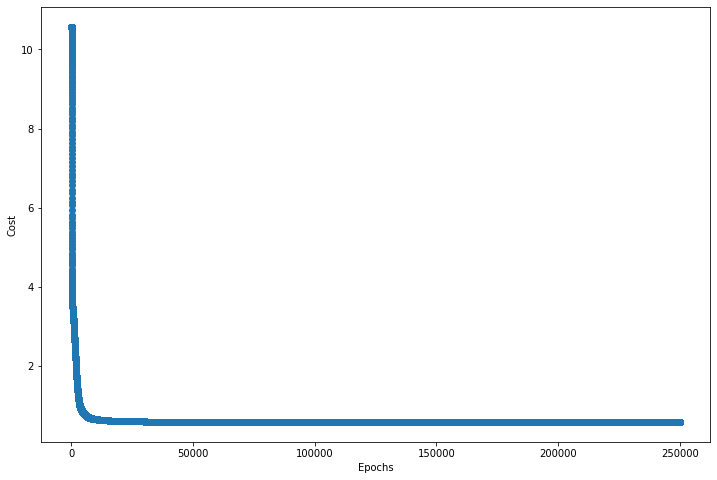

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J)), J)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()